In [13]:
import sys
import os
import pandas as pd
import numpy as np

current_dir = os.path.abspath(".")
package_path = os.path.join(current_dir, "..")
sys.path.append(package_path)

import charting
from models import simulate_port

data_file_path = os.path.join(current_dir, "..", "data", "Asset Return Data.xlsx")
asset_returns_df = pd.read_excel(data_file_path,index_col=0)
asset_returns_df.head()

,IG Credit Spread,HY Credit Spread,IG Credit Bonds,HY Credit Bonds,3-5Y US Treasury,7-10Y US Treasury,Commodities,Equities,Fed Fund ON,US3M T-Bill
Date,,,,,,,,,,
1976-01-30,0.012924,0.012924,0.019812,0.019812,0.004712,0.005342,-0.022095,0.1152,0.003958,0.003942
1976-02-27,0.002049,0.002049,0.007012,0.007012,0.000222,0.001442,0.033647,-0.0092,0.003958,0.004167
1976-03-31,0.005832,0.005832,0.015962,0.015962,0.005032,0.001592,-0.022318,0.0286,0.003958,0.004142
1976-04-30,-0.002698,-0.002698,-0.004517,-0.004517,0.004843,-0.007647,0.040554,-0.0141,0.004067,0.004092
1976-05-31,0.000225,0.000225,-0.011303,-0.011303,-0.014753,-0.006863,0.062235,-0.0110,0.004583,0.004575


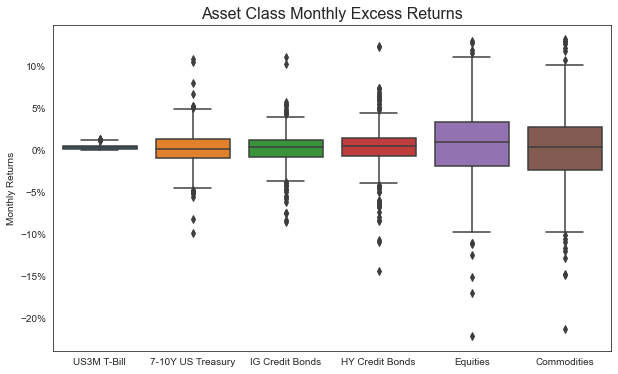

In [14]:
# Full period data boxplot

cash_assets = ['US3M T-Bill', '7-10Y US Treasury', 'IG Credit Bonds', 'HY Credit Bonds', 'Equities', 'Commodities']
asset_returns_df_cash = asset_returns_df[cash_assets].copy()
asset_returns_box = charting.boxplot_monthly_returns(asset_returns_df_cash, figsize=(10,6), title='Asset Class Monthly Excess Returns')

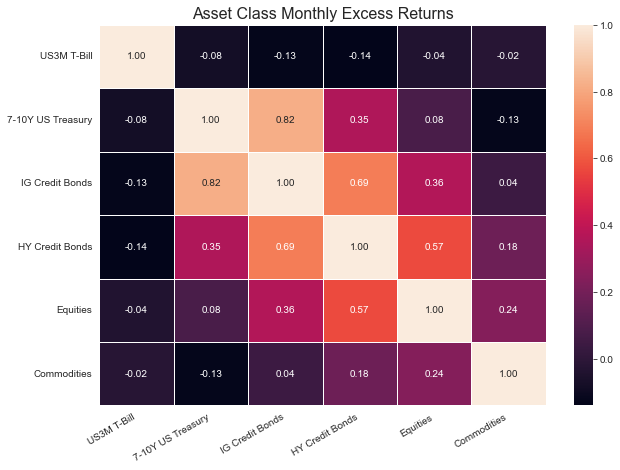

In [15]:
# Full period data correlation matrix

asset_returns_matrix = charting.plot_corr_matrix(asset_returns_df_cash, title='Asset Class Monthly Excess Returns')

In [16]:
# Full period summary stats table

summary = charting.summary_stats_table(asset_returns_df_cash)
summary

,US3M T-Bill,7-10Y US Treasury,IG Credit Bonds,HY Credit Bonds,Equities,Commodities
Mean,0.36%,0.18%,0.21%,0.29%,0.56%,0.19%
Volatility,0.30%,2.13%,1.97%,2.47%,4.38%,4.31%
Median,0.37%,0.18%,0.36%,0.48%,0.90%,0.38%
Min,-0.00%,-9.86%,-8.61%,-14.37%,-22.12%,-21.34%
Max,1.29%,10.88%,11.01%,12.32%,13.01%,13.15%
Skew,0.70,0.14,-0.21,-0.58,-0.55,-0.31
Kurtosis,0.08,3.03,4.89,6.01,1.80,1.55


In [18]:
# Portfolio simulation

asset_ranges = {'US3M T-Bill': [0.0, 0.1], '7-10Y US Treasury': [0.15, 0.35],
                'IG Credit Bonds': [0.15, 0.30], 'HY Credit Bonds': [0.10, 0.30],
                'Equities': [0.10, 0.25], 'Commodities': [0.0, 0.10]}

sim_ports = simulate_port.portfolio_randomizer(asset_ranges)
sim_ports

,US3M T-Bill,7-10Y US Treasury,IG Credit Bonds,HY Credit Bonds,Equities,Commodities
0,0.087769,0.236933,0.264315,0.210821,0.193397,0.006765
1,0.085075,0.180272,0.296772,0.180829,0.210850,0.046202
2,0.068052,0.214973,0.218129,0.180672,0.237028,0.081145
3,0.053323,0.265509,0.194207,0.217032,0.238530,0.031399
4,0.092472,0.293496,0.267846,0.171572,0.103393,0.071221
...,...,...,...,...,...,...
325,0.008260,0.276581,0.295611,0.150522,0.207547,0.061479
326,0.002373,0.302705,0.279783,0.255497,0.128541,0.031100
327,0.060101,0.326599,0.294658,0.126361,0.105085,0.087197
328,0.056570,0.324804,0.197858,0.153847,0.180443,0.086479
